In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

pd.set_option('display.max_columns', None)
sns.set(style='darkgrid')

In [234]:
df = pd.read_csv('strava_data.csv',
                parse_dates=['date'],
                dtype={'time_bins':'category'})

df['time_bins'] = df['time_bins'].cat.set_categories(['4am-8am', '8am-12pm', '12pm-4pm', '4pm-8pm'], ordered=True)

# Lifelong Totals
- Exploring some my life-long activity data
- Data retrieved from Strava

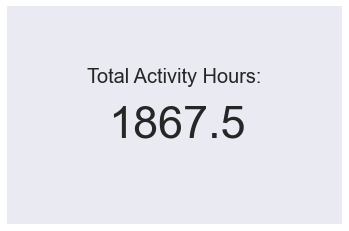

In [14]:
fig, ax = plt.subplots()

plt.text(
    x=.50, 
    y=.65, 
    s='Total Activity Hours:',
    horizontalalignment='center',
    fontsize=20
)

plt.text(
    x=.30, 
    y=.40, 
    s=str(round(df.loc[:,'moving_time'].sum() / 60, 1)),
    fontsize=45
)

for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)
    
plt.xticks([])
plt.yticks([])

plt.show()

Nearly 78 days worth of excercise!

In [ ]:
total_volume = df.set_index('date').loc[:,['moving_time', 'distance']].resample('y').sum()

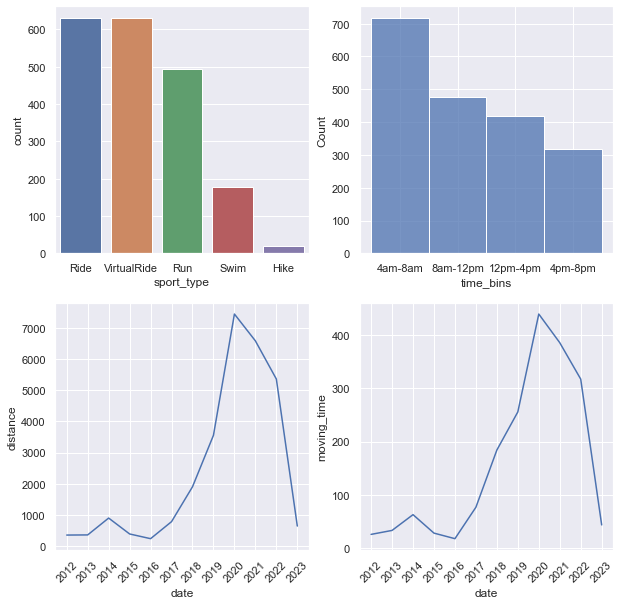

In [92]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

sns.countplot(
    x='sport_type',
    data=df.loc[df['sport_type'].isin(list(df['sport_type'].value_counts().index[:5]))],
    ax=ax[0][0],
    order=df['sport_type'].value_counts().index[:5]
)

sns.histplot(
    x='time_bins',
    data=df,
    ax=ax[0][1]
    
)

sns.lineplot(
    x=total_volume.index.strftime('%Y'),
    y=total_volume['moving_time'] / 60,
    data=total_volume,
    ax=ax[1][1]
)

ax[1][1].set_xticks(total_volume.index.strftime('%Y'))
ax[1][1].set_xticklabels(labels=total_volume.index.strftime('%Y'), rotation=45)

sns.lineplot(
    x=total_volume.index.strftime('%Y'),
    y=total_volume['distance'],
    data=total_volume,
    ax=ax[1][0]
)

ax[1][0].set_xticks(total_volume.index.strftime('%Y'))
ax[1][0].set_xticklabels(labels=total_volume.index.strftime('%Y'), rotation=45)



plt.show()

- It's obvious that I love cycling the most. When it life gets busy, I have found it very convenient to hop on an indoor trainer for a "Virtual Ride on an application called Zwift" which is why there is nearly the same amount of indoor or "Virtual Rides" as outdoor rides.

- I am an early bird! Most of my activities occur in the early morning.

- My fitness journey began in 2017 and has only gotten more and more intense as seen by the increases until around 2021. I did not start working or juggling other responsibilities besides school before then. As I began my last year of undergrad in 2022, I started to work/intern and have more responsibilites that affected my total training volume.

- 2023 totals are low since this analysis was made in February.

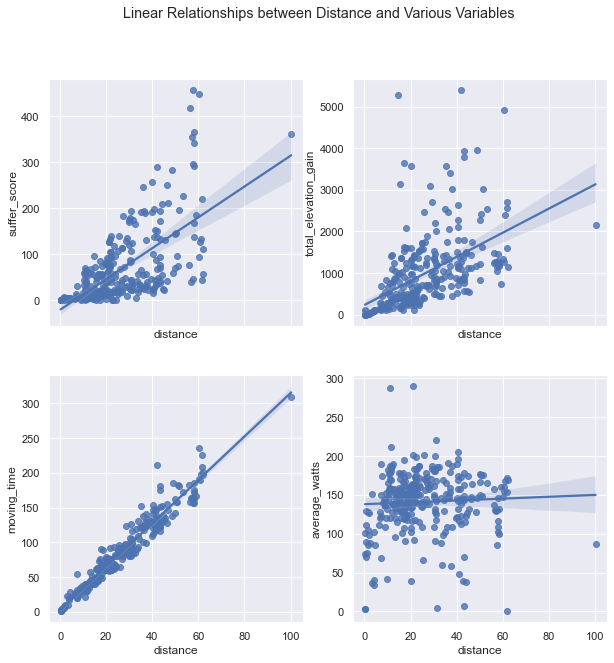

In [148]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex='all')

fig.suptitle('Linear Relationships between Distance and Various Variables')

sns.regplot(
    x='distance',
    y='suffer_score',
    data=df.dropna(),
    ax=ax[0][0]
)

sns.regplot(
    x='distance',
    y='total_elevation_gain',
    data=df.dropna(),
    ax=ax[0][1]
)

sns.regplot(
    x='distance',
    y='moving_time',
    data=df.dropna(),
    ax=ax[1][0]
)

sns.regplot(
    x='distance',
    y='average_watts',
    data=df.dropna(),
    ax=ax[1][1]
)

plt.show()

- I wanted to explore regression plots in python. I decided to explore distance with different variables (Suffer Score, Elevation Gain, Moving Time, and Avg Watts).

- With the first 3 variables, it is expected to have a positive relationship with distance which is seen in the data.

- Avergage wattage does not seem to have a relationship with distance. I expected there be to be a negative correlation overall. 

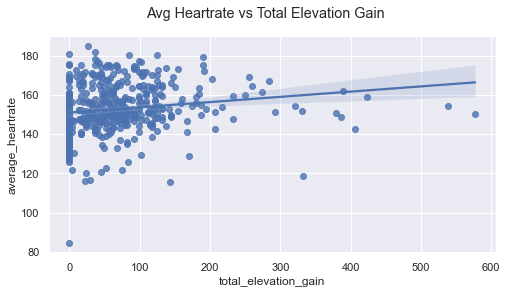

In [277]:
fig, ax = plt.subplots(figsize=(8,4))

sns.regplot(
    x='total_elevation_gain',
    y='average_heartrate',
    data=df.loc[df['sport_type'] == 'Run'].query("total_elevation_gain < 600")
)

fig.suptitle('Avg Heartrate vs Total Elevation Gain')

plt.show()

- I made this plot expecting a strong positive correlation between average heartrate and total elevation gain. After plotting, I realized that I got to excited and forget to take into account other factors like heat, intensity, etc. Regardless, there does still seem to be a positive relationship between average HR and total feet climbed.

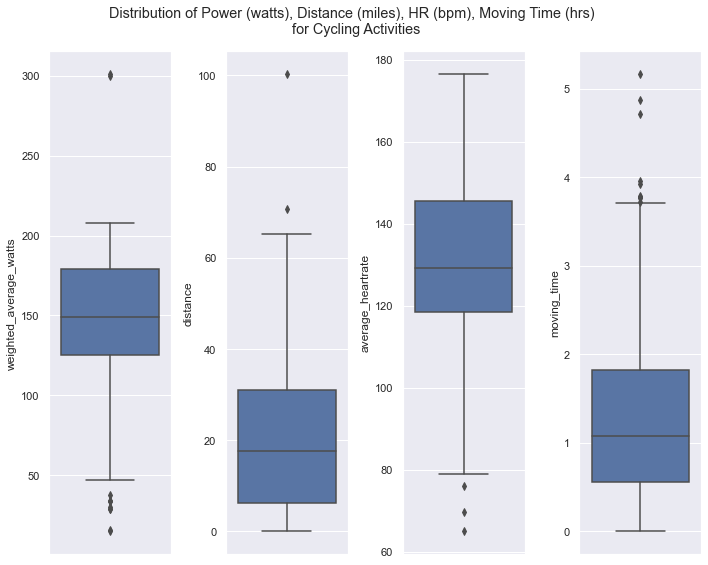

In [147]:
fig, ax = plt.subplots(1, 4, figsize=(10, 8))

fig.suptitle('Distribution of Power (watts), Distance (miles), HR (bpm), Moving Time (hrs) \n for Cycling Activities')


sns.boxplot(
    y='weighted_average_watts',
    data=df.loc[df['sport_type'].isin(['Ride', 'VirualRide'])],
    ax=ax[0]
)

sns.boxplot(
    y='distance',
    data=df.loc[df['sport_type'].isin(['Ride', 'VirualRide'])],
    ax=ax[1]
)

sns.boxplot(
    y='average_heartrate',
    data=df.loc[df['sport_type'].isin(['Ride', 'VirualRide'])],
    ax=ax[2]
)

sns.boxplot(
    y=df.loc[df['sport_type'].isin(['Ride', 'VirualRide'])]['moving_time'] / 60,
    data=df.loc[df['sport_type'].isin(['Ride', 'VirualRide'])],
    ax=ax[3]
)

plt.tight_layout()
plt.show()

- With these box and whisker plots, I wanted to see how my overall power, distance, heartrate, and moving time were distributed in my cycling activities.

- Across my activites, I:
    - average about 150 watts
    - ride around 20 miles or a little over an hour
    - have an average heartrate of 130 BPM
    - had the longest ride at about 100 miles and a little over 5 hours

In [251]:
sport_type_timeseries = (df.loc[df['sport_type'].isin(['Ride','VirtualRide', 'Run', 'Swim'])]
 .pivot_table(index='date', columns='sport_type', values={'id':'count'})
 .resample('Y').count()
 .query("index > '2016-12-31'")
).droplevel(0, axis=1)

sport_type_timeseries = sport_type_timeseries.assign(TotalRide=sport_type_timeseries['Ride'] + sport_type_timeseries['VirtualRide']).iloc[:6]

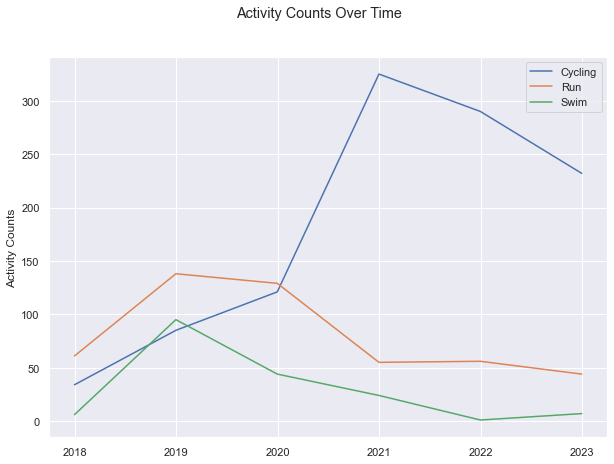

In [252]:
fig, ax = plt.subplots(figsize=(10, 7))

fig.suptitle('Activity Counts Over Time')

ax.plot(sport_type_timeseries['TotalRide'], label='Cycling')
ax.plot(sport_type_timeseries['Run'], label='Run')
ax.plot(sport_type_timeseries['Swim'], label='Swim')

ax.set_ylabel('Activity Counts')

plt.legend()

plt.show()

- This line graph shows my transition from primarily being a runner, to a triathlete, to a cyclist!
- I actually knew that 2020 was when I truly fell in love with cycling. It's pretty awesome to actually see that represented in the data. 

In [255]:
run_pace_pivot = df.loc[(df['sport_type'] == 'Run') & (df['date'].dt.year < 2020), ['date', 'run_pace']].set_index('date').resample('M').mean()

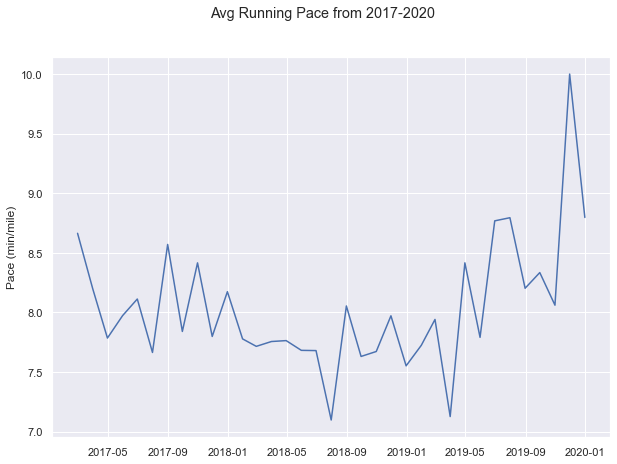

In [256]:
fig, ax = plt.subplots(figsize=(10,7))

fig.suptitle('Avg Running Pace from 2017-2020')

ax.plot(run_pace_pivot['run_pace'])
ax.set_ylabel('Pace (min/mile)')

plt.show()

- This line graph shows my progression in my running pace over time as I learned how to train better and actually began to race.
- I started running in 2017 and started to transition to primarily cycling in 2020.

In [232]:
 bike_pace_pivot = df.loc[(df['sport_type'].isin(['VirtualRide', 'Ride'])) & (df['date'].dt.year > 2017), ['date', 'average_speed', 'average_watts']].set_index('date').resample('M').mean()

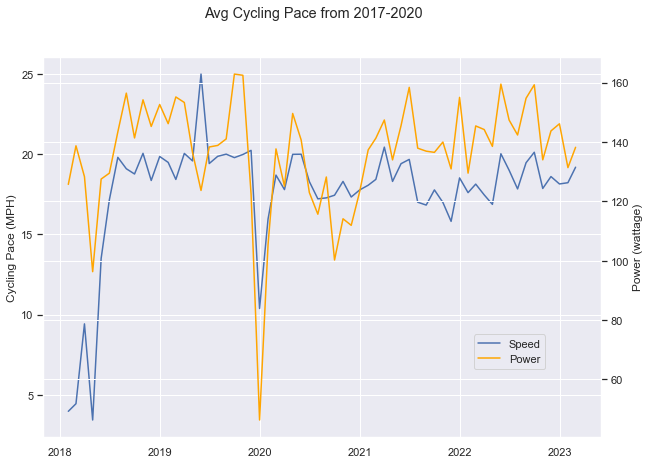

In [233]:
fig, ax = plt.subplots(figsize=(10, 7))

fig.suptitle('Avg Cycling Pace from 2018-2023')

ax.plot(bike_pace_pivot['average_speed'], label='Speed')

ax2 = ax.twinx()

ax2.plot(bike_pace_pivot['average_watts'], label='Power', color='orange')

ax.set_ylabel('Cycling Pace (MPH)')
ax2.set_ylabel('Power (wattage)')

fig.legend(bbox_to_anchor=(.83,.34))

plt.show()

In [258]:
bike_pace_pivot.mean()

average_speed     17.621086
average_watts    136.386369
dtype: float64

- Overall, my cycling performance has been rather steady. However, on closer inspection, it can be seen that it is cyclical while still hovering around the average of 17 MPH.
- The large dips represents times when I was not riding (COVID or on vacation).
- I believe that the cyclical nature or utilizing "training blocks" allows me to be more consistent with my pace and power.

## Tableau:

- This data is connected to a Tableau dashboard! To view it, please follow this link:

    https://public.tableau.com/app/profile/jairus.martinez/viz/PersonalStravaActivityData/Dashboard1